In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
x=np.array((1,2,3,4,5,6))
y=np.array((1,3,3,4,5,5))

In [107]:
print(x,y)

[1 2 3 4 5 6] [1 3 3 4 5 5]


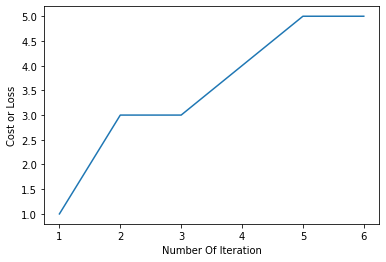

In [113]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=10
    n=len(x)
    learning_rate=0.01
    for i in range(iterations):
        yp=m_curr*x+b_curr
        cost=(1/n)* sum([val**2 for val in (y-yp)])
        md = -(2/n)* sum(x*(y-yp))
        bd = -(2/n) * sum (y-yp)
        
        m_curr = m_curr - learning_rate *md
        b_curr= b_curr -learning_rate *bd
        print("m {}, b {}, cost iteration {}".format(m_curr,b_curr,cost,i))
    pass



In [109]:
gradient_descent(x,y)

m 0.29, b 0.07, cost iteration 14.166666666666666
m 0.4871333333333333, b 0.11830000000000002, cost iteration 6.689183333333334
m 0.6210885555555555, b 0.15183466666666667, cost iteration 3.2281230840740744
m 0.712063267037037, b 0.17532177444444447, cost iteration 1.6259858114517922
m 0.773798218491358, b 0.19197091026296298, cost iteration 0.8842157211937784
m 0.815641461830572, b 0.20396561676330865, cost iteration 0.5406512187719745
m 0.8439526252352002, b 0.21279140209990244, cost iteration 0.38139003869808874
m 0.8630582641001964, b 0.2194588902914404, cost iteration 0.3074317815230537
m 0.8759018016694027, b 0.22465563399859784, cost iteration 0.27295607886944684
m 0.8844856941164487, b 0.2288493952017677, cost iteration 0.2567558763831943


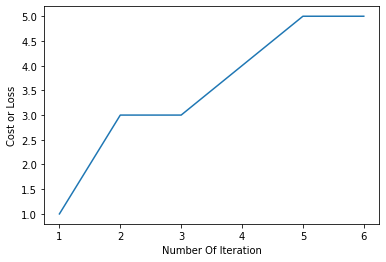

In [114]:
plt.plot(x,y)
plt.xlabel("Number Of Iteration")
plt.ylabel("Cost or Loss")
plt.show()

Estimated coefficients:
theta_0 = 1.1428571428571428 
theta_1 = 0.7428571428571429


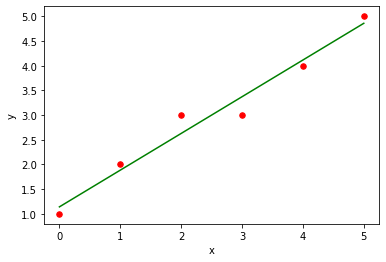

9.3143


In [103]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
    n = np.size(x) 
    m_x, m_y = np.mean(x), np.mean(y) 

    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    theta_1 = SS_xy / SS_xx 
    theta_0 = m_y - theta_1*m_x 

    return(theta_0, theta_1) 

def plot_regression_line(x, y, theta): 

    plt.scatter(x, y, color = "r",marker = "o", s = 30) 
    y_pred = theta[0] + theta[1]*x 

    plt.plot(x, y_pred, color = "g") 

    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 


x = np.array([0, 1, 2, 3, 4, 5]) 
y = np.array([1, 2, 3, 3, 4, 5]) 

theta = estimate_coef(x, y) 
print("Estimated coefficients:\ntheta_0 = {} \ntheta_1 = {}".format(theta[0], theta[1])) 

plot_regression_line(x, y, theta) 

print(round(theta[0]+ theta[1]*11,4))


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [66]:
data_df = pd.read_csv(r"C:\Users\DarkReaper\Desktop\linear.csv", header=None, names=['X','y'])
data_df.head()

X  y
0  1  1
1  2  3
2  3  3
3  4  2
4  5  5

In [67]:
n_rows = data_df.shape[0]


In [68]:
X=data_df['X'].to_numpy().reshape(n_rows,1)
ones=np.ones((n_rows,1))
X=np.concatenate((ones,X),axis=1)
y=data_df['y'].to_numpy().reshape(n_rows,1)
def compute_cost(X, y, theta=np.array([[0],[0]])):
   
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [69]:
compute_cost(X,y)


array([6.08333333])

In [70]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):

    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
        return (theta, J_history, theta0_history, theta1_history)

In [71]:
num_iterations=10
theta_init=np.array([[1],[1]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [72]:
theta


array([[0.99866667],
       [0.9945    ]])

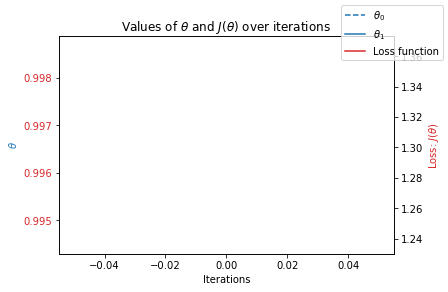

In [74]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [79]:
data_df = pd.read_csv(r"C:\Users\DarkReaper\Desktop\linear.csv", header=None, names=['X','y'])
data_df.head()

X  y
0  1  1
1  2  3
2  3  3
3  4  2
4  5  5

In [80]:
data_df.shape



(6, 2)

In [81]:
n_rows = data_df.shape[0]


In [82]:
X=data_df['X'].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=data_df['y'].to_numpy().reshape(n_rows,1)

In [83]:
X.shape, y.shape


((6, 2), (6, 1))

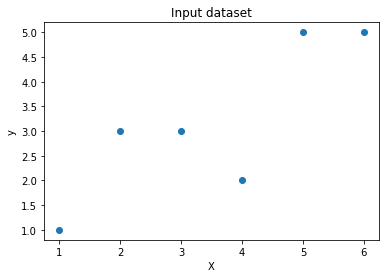

In [84]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');